<a href="https://colab.research.google.com/github/dinhquy-nguyen-1704/Weekly_exercise/blob/main/Softmax_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


##Card Fraud Detection

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv("/content/drive/MyDrive/CODE/Bài tập AIO/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
dataset_arr = df.to_numpy()
X, y = dataset_arr[:, :-1].astype(np.float64), dataset_arr[:, -1].astype(np.float64)

In [5]:
intercept = np.ones((X.shape[0], 1))

In [6]:
X_b = np.concatenate((intercept, X), axis=1)

In [7]:
n_classes = np.unique(y, axis=0).shape[0]
n_classes

2

In [8]:
n_samples = y.shape[0]

In [9]:
y_encoded = np.array(
                    [np.zeros(n_classes) for _ in range(n_samples)]
                    )

for i in range(n_samples):

    if y[i] == 0:
        y_encoded[i][0] = 1
    else:
        y_encoded[i][1] = 1

In [10]:
val_size = 0.3
test_size = 0.1
random_state = 2
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(
                                                  X_b, y_encoded,
                                                  test_size=val_size,
                                                  random_state=random_state,
                                                  shuffle=is_shuffle
                                                  )

X_val, X_test, y_val, y_test = train_test_split(
                                                X_val, y_val,
                                                test_size=test_size,
                                                random_state=random_state,
                                                shuffle=is_shuffle
                                                )

In [11]:
normalizer = StandardScaler()

X_train[:, 1:] = normalizer.fit_transform(X_train[:, 1:])
X_val[:, 1:] = normalizer.fit_transform(X_val[:, 1:])
X_test[:, 1:] = normalizer.fit_transform(X_test[:, 1:])

In [12]:
def softmax(z):
    exp_z = np.exp(z)

    return exp_z/exp_z.sum(axis=1)[:, None]

def predict(X, theta):
    z = np.dot(X, theta)
    y_hat = softmax(z)

    return y_hat

def compute_loss(y_hat, y):
    n = y.size

    return (-1/n)*np.sum(y*np.log(y_hat))

def compute_gradient(X, y, y_hat):
    n = y.size

    return np.dot(X.T, (y_hat-y))/n

def update_theta(theta, gradient, lr):
    return theta - lr*gradient

def compute_accuracy(X, y, theta):
    y_hat = predict(X, theta)
    acc = (np.argmax(y_hat, axis =1) == np.argmax(y, axis =1)).mean()

    return acc

In [18]:
lr = 0.01
epochs = 30
batch_size = 1024
n_features = X_train.shape[1]

np.random.seed(random_state)
theta = np.random.uniform(
                          size=(n_features, n_classes)
                          )

In [19]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []

    for i in range(0, X_train.shape[0], batch_size):
        X_i = X_train[i: i+batch_size]
        y_i = y_train[i: i+batch_size]

        y_hat = predict(X_i, theta)

        train_loss = compute_loss(y_hat, y_i)

        gradient = compute_gradient(X_i, y_i, y_hat)

        theta = update_theta(theta, gradient, lr)


        train_batch_losses.append(train_loss)

        train_acc = compute_accuracy(X_train, y_train, theta)
        train_batch_accs.append(train_acc)

        y_val_hat = predict(X_val, theta)
        val_loss = compute_loss(y_val_hat, y_val)
        val_batch_losses.append(val_loss)

        val_acc = compute_accuracy(X_val, y_val, theta)
        val_batch_accs.append(val_acc)

    train_batch_loss = sum(train_batch_losses)/len(train_batch_losses)
    val_batch_loss = sum(val_batch_losses)/len(val_batch_losses)
    train_batch_acc = sum(train_batch_accs)/len(train_batch_accs)
    val_batch_acc = sum(val_batch_accs)/len(val_batch_accs)

    train_losses.append(train_batch_loss)
    val_losses.append(val_batch_loss)
    train_accs.append(train_batch_acc)
    val_accs.append(val_batch_acc)

    print(f'\nEPOCH{epoch + 1}:\tTraining loss: {train_batch_loss :.3f}\tValidation loss: { val_batch_loss :.3f}')


EPOCH1:	Training loss: 0.300	Validation loss: 0.301

EPOCH2:	Training loss: 0.176	Validation loss: 0.176

EPOCH3:	Training loss: 0.115	Validation loss: 0.115

EPOCH4:	Training loss: 0.082	Validation loss: 0.082

EPOCH5:	Training loss: 0.062	Validation loss: 0.062

EPOCH6:	Training loss: 0.050	Validation loss: 0.049

EPOCH7:	Training loss: 0.041	Validation loss: 0.041

EPOCH8:	Training loss: 0.035	Validation loss: 0.035

EPOCH9:	Training loss: 0.031	Validation loss: 0.031

EPOCH10:	Training loss: 0.028	Validation loss: 0.027

EPOCH11:	Training loss: 0.025	Validation loss: 0.025

EPOCH12:	Training loss: 0.023	Validation loss: 0.023

EPOCH13:	Training loss: 0.021	Validation loss: 0.021

EPOCH14:	Training loss: 0.020	Validation loss: 0.020

EPOCH15:	Training loss: 0.019	Validation loss: 0.018

EPOCH16:	Training loss: 0.017	Validation loss: 0.017

EPOCH17:	Training loss: 0.017	Validation loss: 0.016

EPOCH18:	Training loss: 0.016	Validation loss: 0.015

EPOCH19:	Training loss: 0.015	Valida

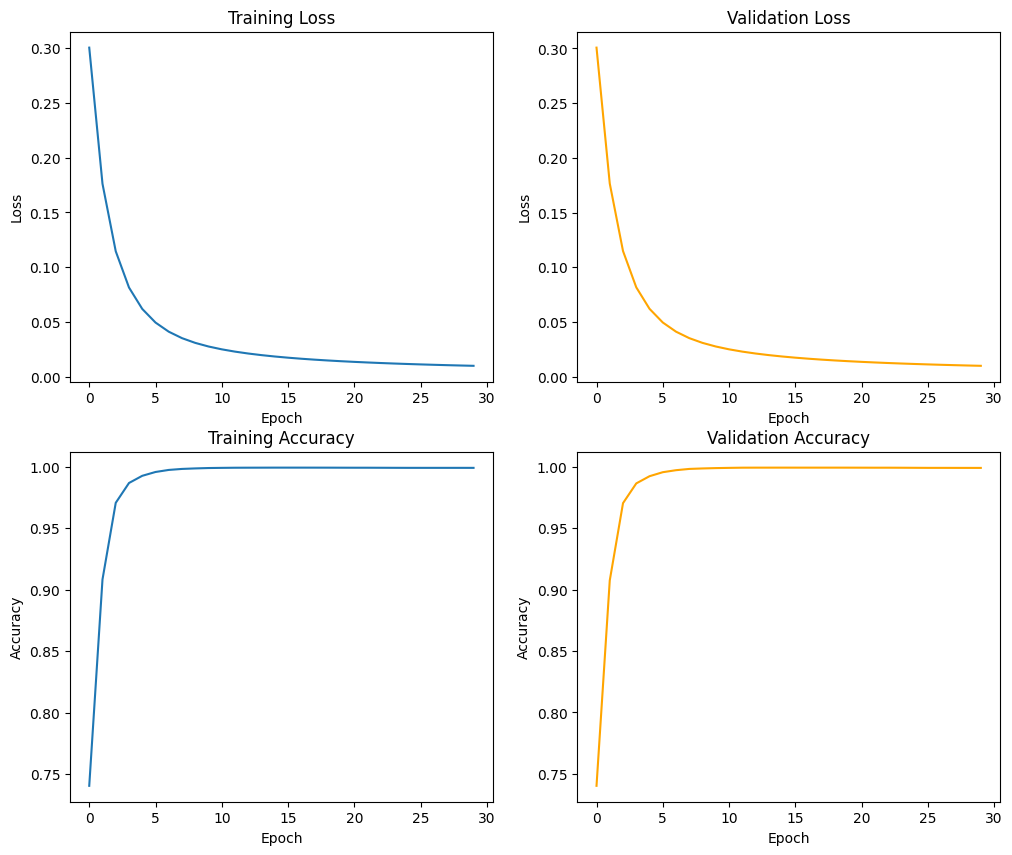

In [20]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
ax[0, 0].set_title('Training Loss')

ax[0, 1].plot(val_losses, 'orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss')

ax[1, 0].plot(train_accs)
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')

ax[1, 1].plot(val_accs, 'orange')
ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 1].set_title('Validation Accuracy')

plt.show()

In [21]:
val_set_acc = compute_accuracy(X_val, y_val, theta)
test_set_acc = compute_accuracy(X_test, y_test, theta)
print('Evaluation on validation and test set:')
print(f'Accuracy: {val_set_acc}')
print(f'Accuracy: {test_set_acc}')

Evaluation on validation and test set:
Accuracy: 0.9992197456370777
Accuracy: 0.9994148624926857


## Twitter Sentiment Analysis

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopword')

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

[nltk_data] Error loading stopword: Package 'stopword' not found in
[nltk_data]     index


In [24]:
df = pd.read_csv("/content/drive/MyDrive/CODE/Bài tập AIO/Twitter_Data.csv")
df = df.dropna()

df

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [26]:
def text_normalize(text):

    text = text.lower()

    text = re.sub(r'^rt[\s]+', '', text)

    text = re.sub (r'https?:\/\/.*[\r\n]*', '', text)

    text = re.sub(r'[^\w\s]', '', text)

    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    text = ' '.join(words)

    stemmer = SnowballStemmer('english')
    words = text.split()
    words = [stemmer.stem(word) for word in words]
    text = ' '.join(words)

    return text

In [27]:
vectorizer = TfidfVectorizer(max_features=2000)
X = vectorizer.fit_transform(df['clean_text']).toarray()

In [28]:
intercept = np.ones((X.shape[0], 1))
X_b = np.concatenate((intercept, X), axis=1)

In [40]:
n_classes = df['category'].unique().shape[0]
n_samples = df['category'].size

y = df['category'].to_numpy() + 1
y = y.astype(np.uint8)
y_encoded = np.array(
                    [np.zeros(n_classes) for _ in range(n_samples)]
                    )

for i in range(n_samples):

    if y[i] == 0:
        y_encoded[i][0] = 1
    elif y[i] == 1:
        y_encoded[i][1] = 1
    else:
        y_encoded[i][2] = 1

In [41]:
val_size = 0.3
test_size = 0.1
random_state = 2
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(
                                                  X_b, y_encoded,
                                                  test_size=val_size,
                                                  random_state=random_state,
                                                  shuffle=is_shuffle
                                                  )

X_val, X_test, y_val, y_test = train_test_split(
                                                X_val, y_val,
                                                test_size=test_size,
                                                random_state=random_state,
                                                shuffle=is_shuffle
                                                )

In [42]:
def softmax(z):
    exp_z = np.exp(z)

    return exp_z/exp_z.sum(axis=1)[:, None]

def predict(X, theta):
    z = np.dot(X, theta)
    y_hat = softmax(z)

    return y_hat

def compute_loss(y_hat, y):
    n = y.size

    return (-1/n)*np.sum(y*np.log(y_hat))

def compute_gradient(X, y, y_hat):
    n = y.size

    return np.dot(X.T, (y_hat-y))/n

def update_theta(theta, gradient, lr):
    return theta - lr*gradient

def compute_accuracy(X, y, theta):
    y_hat = predict(X, theta)
    acc = (np.argmax(y_hat, axis =1) == np.argmax(y, axis =1)).mean()

    return acc

In [43]:
lr = 0.1
epochs = 200
batch_size = X_train.shape[0]
n_features = X_train.shape[1]

np.random.seed(random_state)
theta = np.random.uniform(
                          size=(n_features, n_classes)
                          )

In [44]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []

    for i in range(0, X_train.shape[0], batch_size):
        X_i = X_train[i: i+batch_size]
        y_i = y_train[i: i+batch_size]

        y_hat = predict(X_i, theta)

        train_loss = compute_loss(y_hat, y_i)

        gradient = compute_gradient(X_i, y_i, y_hat)

        theta = update_theta(theta, gradient, lr)


        train_batch_losses.append(train_loss)

        train_acc = compute_accuracy(X_train, y_train, theta)
        train_batch_accs.append(train_acc)

        y_val_hat = predict(X_val, theta)
        val_loss = compute_loss(y_val_hat, y_val)
        val_batch_losses.append(val_loss)

        val_acc = compute_accuracy(X_val, y_val, theta)
        val_batch_accs.append(val_acc)

    train_batch_loss = sum(train_batch_losses)/len(train_batch_losses)
    val_batch_loss = sum(val_batch_losses)/len(val_batch_losses)
    train_batch_acc = sum(train_batch_accs)/len(train_batch_accs)
    val_batch_acc = sum(val_batch_accs)/len(val_batch_accs)

    train_losses.append(train_batch_loss)
    val_losses.append(val_batch_loss)
    train_accs.append(train_batch_acc)
    val_accs.append(val_batch_acc)

    print(f'\nEPOCH{epoch + 1}:\tTraining loss: {train_batch_loss :.3f}\tValidation loss: { val_batch_loss :.3f}')


EPOCH1:	Training loss: 0.377	Validation loss: 0.377

EPOCH2:	Training loss: 0.377	Validation loss: 0.376

EPOCH3:	Training loss: 0.377	Validation loss: 0.376

EPOCH4:	Training loss: 0.376	Validation loss: 0.375

EPOCH5:	Training loss: 0.376	Validation loss: 0.375

EPOCH6:	Training loss: 0.376	Validation loss: 0.375

EPOCH7:	Training loss: 0.375	Validation loss: 0.375

EPOCH8:	Training loss: 0.375	Validation loss: 0.374

EPOCH9:	Training loss: 0.375	Validation loss: 0.374

EPOCH10:	Training loss: 0.374	Validation loss: 0.374

EPOCH11:	Training loss: 0.374	Validation loss: 0.373

EPOCH12:	Training loss: 0.374	Validation loss: 0.373

EPOCH13:	Training loss: 0.374	Validation loss: 0.373

EPOCH14:	Training loss: 0.373	Validation loss: 0.373

EPOCH15:	Training loss: 0.373	Validation loss: 0.372

EPOCH16:	Training loss: 0.373	Validation loss: 0.372

EPOCH17:	Training loss: 0.373	Validation loss: 0.372

EPOCH18:	Training loss: 0.372	Validation loss: 0.372

EPOCH19:	Training loss: 0.372	Valida

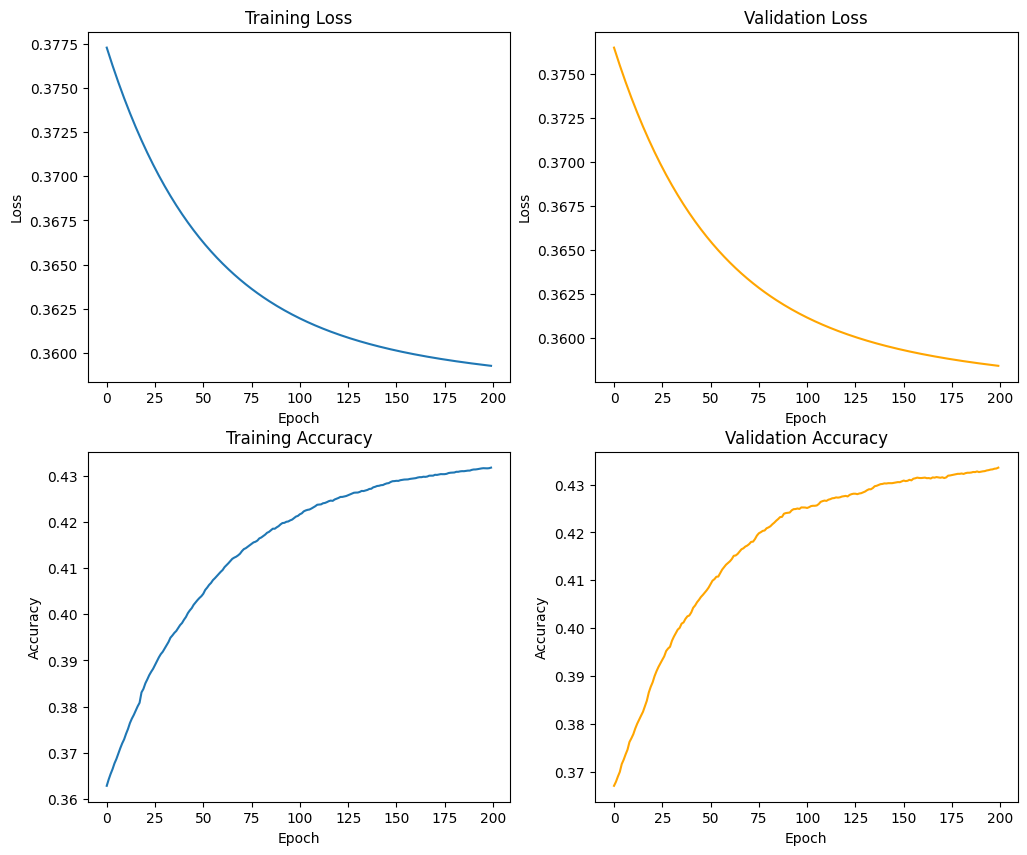

In [45]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
ax[0, 0].set_title('Training Loss')

ax[0, 1].plot(val_losses, 'orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss')

ax[1, 0].plot(train_accs)
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')

ax[1, 1].plot(val_accs, 'orange')
ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 1].set_title('Validation Accuracy')

plt.show()

In [46]:
val_set_acc = compute_accuracy(X_val, y_val, theta)
test_set_acc = compute_accuracy(X_test, y_test, theta)
print('Evaluation on validation and test set:')
print(f'Accuracy: {val_set_acc}')
print(f'Accuracy: {test_set_acc}')

Evaluation on validation and test set:
Accuracy: 0.43355832821981316
Accuracy: 0.43006134969325155
